In [55]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
# import geopandas as gp
# import datetime
import pylab as plt
import os

from palettable.colorbrewer.qualitative import Paired_11
from palettable.wesanderson import GrandBudapest3_6

from scipy import stats

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [29]:
### automatically gets all dataframes from 'finished_data' folder, 
### so you can add more files and run code withoit
### any chage


def getAllFinished(mypath):
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k))[cols] for k in files}

In [30]:
dfs = getAllFinished('/Users/casy/Dropbox/CUSP/project/Square_cities/data/finished_data/')

In [101]:
toKS = {}

for k,v in dfs.iteritems():
    v = v[v.checkIns>100]
    v['r'] = v.users/v.checkIns
    v = v[v.r<=1]
    toKS[k]=v



/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


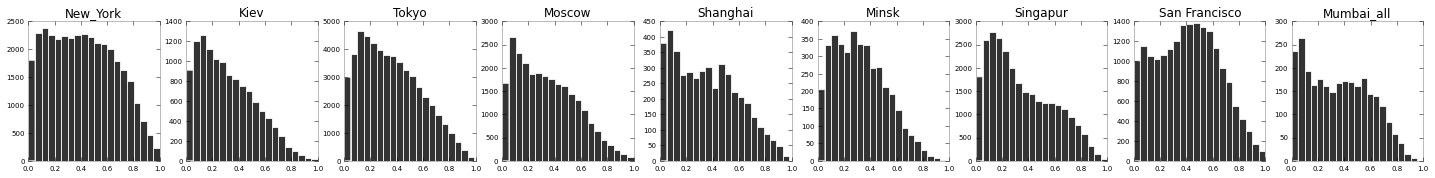

In [102]:
fig, axes = plt.subplots(1,len(dfs.keys()))
fig.set_size_inches(25, 2.5)

for i, (k,s) in enumerate(list(toKS.iteritems())):
#     print k
    axes[i].tick_params(axis='both', which='major', labelsize=7)
    axes[i].set_xlim([0, 1])
    axes[i].set_title(k, fontsize=12)
    s.r.hist(ax=axes[i], color='k', alpha=.8, grid=0, bins=20)
    
plt.savefig('img/ratio_comp.png', bbox_inches='tight')


In [103]:
results =[]
alpha = .05

cities = list(toKS.keys())
for i,city1 in enumerate(cities):
    for city2 in cities[i+1:]:
        results.append({'city1':city1,'city2':city2, 'ks':stats.ks_2samp(toKS[city1].r,toKS[city2].r)[1]})
r = pd.DataFrame(results)
r['result'] = r['ks']< alpha
r

,city1,city2,ks,result
0,New_York,Kiev,4.408501e-261,True
1,New_York,Tokyo,2.895156e-215,True
2,New_York,Moscow,1.969995e-212,True
3,New_York,Shanghai,7.956583e-28,True
4,New_York,Minsk,8.937859e-104,True
5,New_York,Singapur,2.789095e-283,True
6,New_York,San Francisco,1.155402e-12,True
7,New_York,Mumbai_all,2.248665e-15,True
8,Kiev,Tokyo,6.370046e-58,True
9,Kiev,Moscow,3.742981e-23,True


In [84]:
# Trying to implement Anderson-D
stats.ks_2samp(toKS['Moscow'],toKS['Minsk'])[1]

2.8775734371713893e-10

In [108]:
cats = ['Travel & Transport',
 'Shop & Service',
 'Arts & Entertainment',
 'College & University',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Food',
 'Event',
 'Nightlife Spot',
 'Residence']


results =[]
alpha = .05

cities = list(toKS.keys())
for i,city1 in enumerate(cities):
    for city2 in cities[i+1:]:
        df1= toKS[city1]
        df2= toKS[city2]
        for cat in cats:
            if len(df1[df1.genCategory==cat])>30 and len(df2[df2.genCategory==cat])>30:
                results.append({'city1':city1,'city2':city2,'category':cat, 'ks':stats.ks_2samp(df1[df1.genCategory==cat].r,df2[df2.genCategory==cat].r)[1]})
r = pd.DataFrame(results)
r['result'] = r['ks']< alpha
r[~r.result]

,category,city1,city2,ks,result
23,Professional & Other Places,New_York,Moscow,0.171996,False
31,Outdoors & Recreation,New_York,Shanghai,0.216311,False
57,College & University,New_York,San Francisco,0.857878,False
62,Residence,New_York,San Francisco,0.726527,False
66,College & University,New_York,Mumbai_all,0.326559,False
68,Professional & Other Places,New_York,Mumbai_all,0.064675,False
71,Residence,New_York,Mumbai_all,0.307640,False
86,Professional & Other Places,Kiev,Moscow,0.089459,False
88,Nightlife Spot,Kiev,Moscow,0.266452,False
97,Nightlife Spot,Kiev,Shanghai,0.179087,False


In [112]:
# percentage failed
1.0*len(r[~r.result])/len(r)

0.14814814814814814

In [128]:
# most different city
r[~r.result].groupby(['city1','city2']).size().reset_index().sort_values(0, ascending=0).reset_index()

,index,city1,city2,0
0,0,Kiev,Minsk,5
1,10,Moscow,Mumbai_all,4
2,17,San Francisco,Mumbai_all,4
3,9,Moscow,Minsk,4
4,19,Shanghai,Mumbai_all,3
5,14,New_York,Mumbai_all,3
6,21,Singapur,Mumbai_all,2
7,20,Shanghai,San Francisco,2
8,15,New_York,San Francisco,2
9,1,Kiev,Moscow,2
